### 패키지 설치 및 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycaret
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

In [3]:
from pycaret.classification import *

In [4]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
plt.rc('font', family='NanumGothic')

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import warnings # 경고 메시지 무시
warnings.filterwarnings(action='ignore')

## 데이터 불러오기, 자료 확인

In [6]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Age

In [9]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
train['Age'].isna().sum()

177

In [11]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

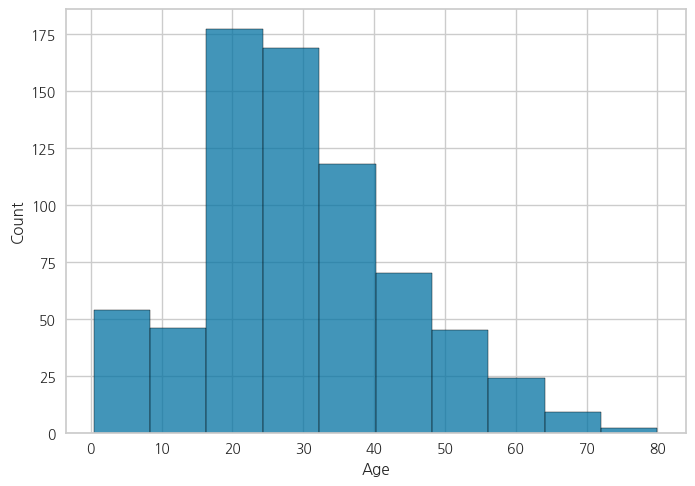

In [12]:
sns.histplot(train, x='Age', kde=False, bins=10)
plt.show()

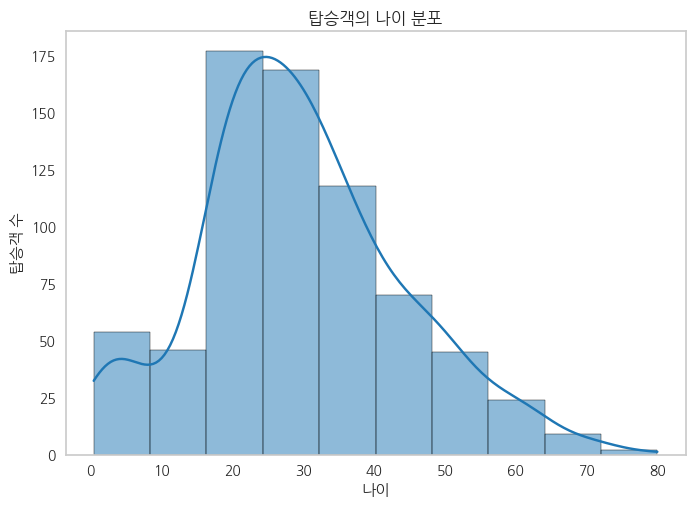

In [13]:
sns.histplot(train, x='Age', kde=True, bins=10, color='#1f77b4')
plt.grid(False)
plt.title('탑승객의 나이 분포')
plt.xlabel('나이')
plt.ylabel('탑승객 수')
plt.show()

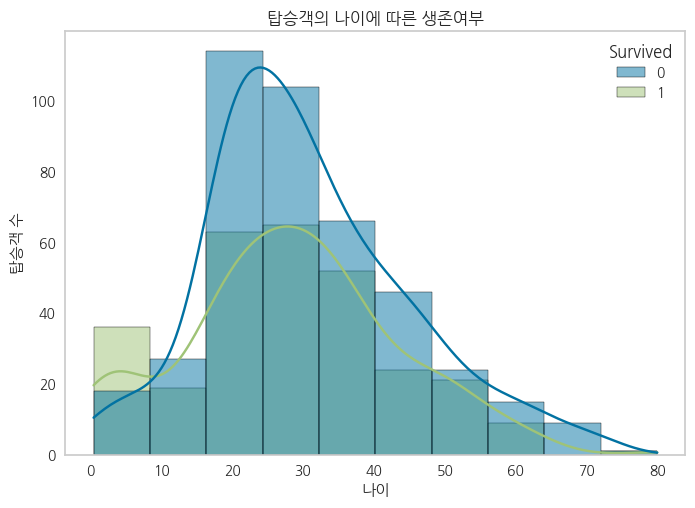

In [14]:
sns.histplot(train, x='Age', kde=True, bins=10, hue='Survived', color='#1f77b4')
plt.grid(False)
plt.title('탑승객의 나이에 따른 생존여부')
plt.xlabel('나이')
plt.ylabel('탑승객 수')
plt.show()

In [15]:
subset = train[['Age', 'Sex', 'Pclass']]

# 성별을 범주형 변수로 변환 (0: 여성, 1: 남성)
subset['Sex'] = subset['Sex'].map({'female': 0, 'male': 1})

# 상관계수 계산
correlation_matrix = subset.corr()

# 상관계수 출력
print(correlation_matrix)

             Age       Sex    Pclass
Age     1.000000  0.093254 -0.369226
Sex     0.093254  1.000000  0.131900
Pclass -0.369226  0.131900  1.000000


In [16]:
age_median = train.groupby(['Pclass', 'Sex'])['Age'].median()

# pclass, 성별에 따른 중앙값으로 결측치 대체
train['Age'] = train.apply(lambda row: age_median[row['Pclass'], row['Sex']] if pd.isnull(row['Age']) else row['Age'], axis=1)

# 결측치가 대체된 데이터 확인
train[['Pclass','Sex','Age']]

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,21.5
889,1,male,26.0


In [17]:
test['Age'] = test.apply(lambda row: age_median[row['Pclass'], row['Sex']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [30]:
print(train['Age'].isna().sum())
print(test['Age'].isna().sum())

0
0


## SibSp

In [19]:
pd.crosstab([train.SibSp],train.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [20]:
pd.crosstab(train.SibSp,train.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


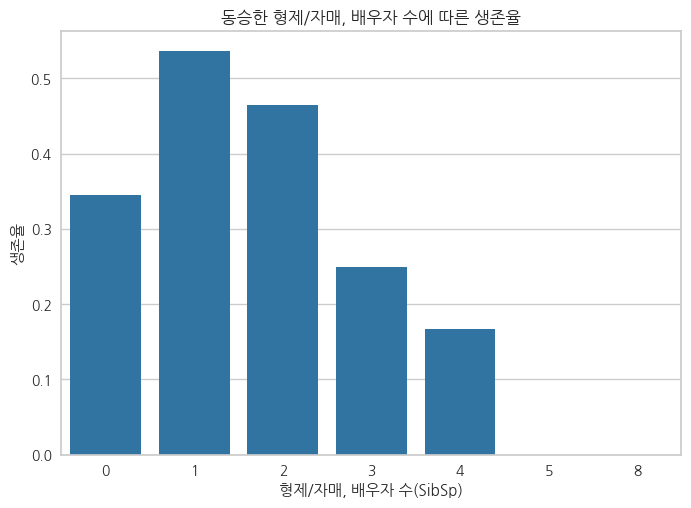

In [21]:
bar = sns.barplot(train,x='SibSp',y='Survived', ci=None, color='#1f77b4')
bar.set_xlabel('형제/자매, 배우자 수(SibSp)')
bar.set_ylabel('생존율')
bar.set_title('동승한 형제/자매, 배우자 수에 따른 생존율')
plt.show()

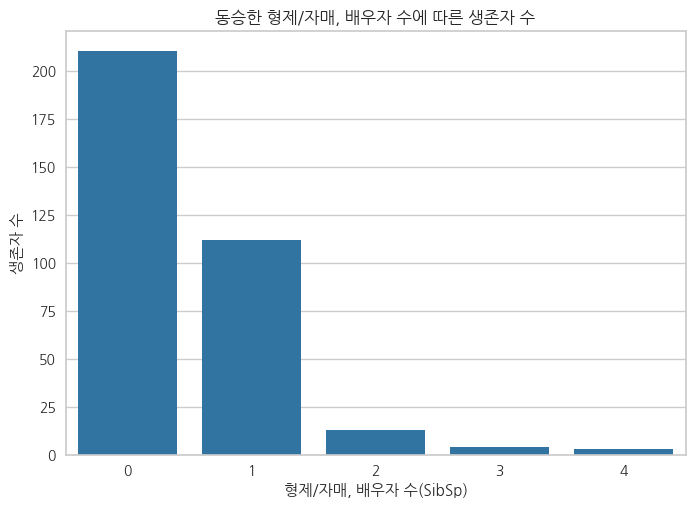

In [22]:
survived_count = train[train['Survived'] == 1].groupby('SibSp')['Survived'].count().reset_index()

# Plot the barplot
bar = sns.barplot(data=survived_count, x='SibSp', y='Survived', color='#1f77b4')
bar.set_xlabel('형제/자매, 배우자 수(SibSp)')
bar.set_ylabel('생존자 수')
bar.set_title('동승한 형제/자매, 배우자 수에 따른 생존자 수')
plt.show()

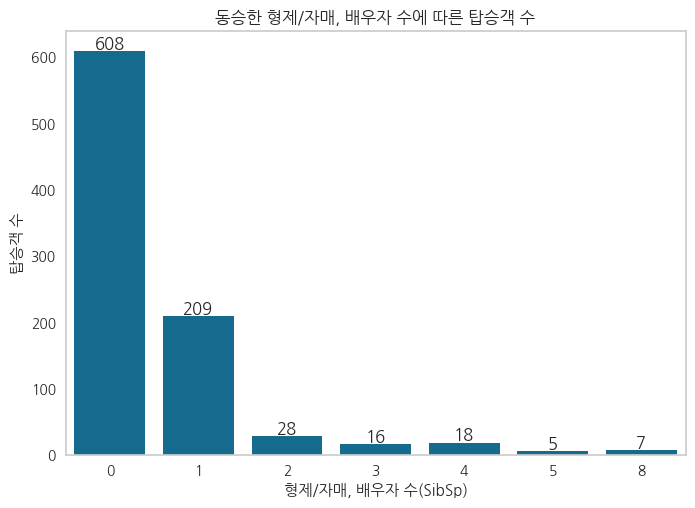

In [23]:
Sibsp_counts = train['SibSp'].value_counts()

# barplot 그래프 그리기
ax = sns.barplot(x=Sibsp_counts.index, y=Sibsp_counts.values)

# 각 막대 위에 숫자 표시
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel('형제/자매, 배우자 수(SibSp)')
plt.ylabel('탑승객 수')
plt.title('동승한 형제/자매, 배우자 수에 따른 탑승객 수')
plt.grid(False)
plt.show()

## Family

In [24]:
pd.crosstab(train.Parch,train.Survived)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [25]:
pd.crosstab(train.Parch,train.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


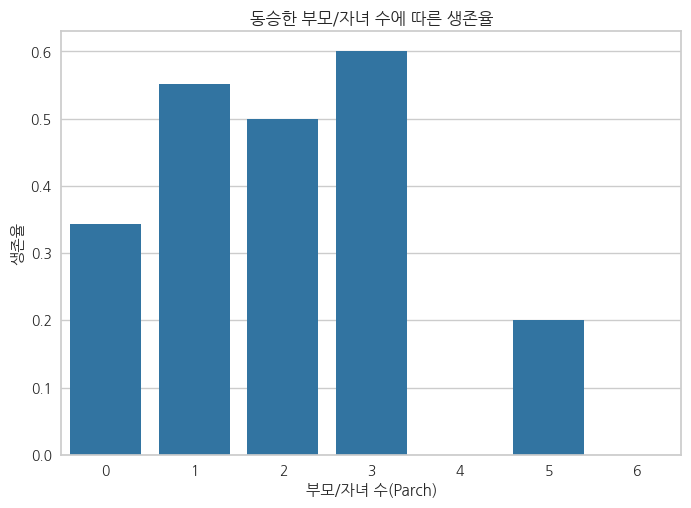

In [26]:
bar = sns.barplot(train,x='Parch',y='Survived', ci=None, color='#1f77b4')
bar.set_xlabel('부모/자녀 수(Parch)')
bar.set_ylabel('생존율')
bar.set_title('동승한 부모/자녀 수에 따른 생존율')
plt.show()

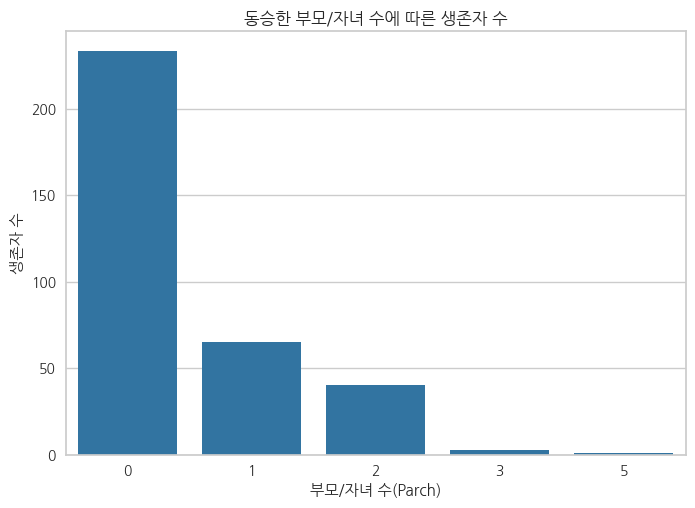

In [27]:
survived_count = train[train['Survived'] == 1].groupby('Parch')['Survived'].count().reset_index()

# Plot the barplot
bar = sns.barplot(data=survived_count, x='Parch', y='Survived', color='#1f77b4')
bar.set_xlabel('부모/자녀 수(Parch)')
bar.set_ylabel('생존자 수')
bar.set_title('동승한 부모/자녀 수에 따른 생존자 수')
plt.show()

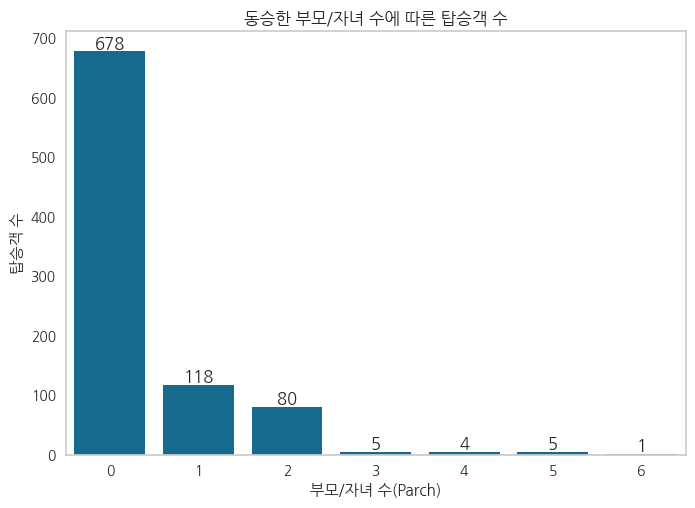

In [28]:
# Parch에 따른 탑승객 수 계산
parch_counts = train['Parch'].value_counts()

# barplot 그래프 그리기
ax = sns.barplot(x=parch_counts.index, y=parch_counts.values)

# 각 막대 위에 숫자 표시
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.title('동승한 부모/자녀 수에 따른 탑승객 수')
plt.xlabel('부모/자녀 수(Parch)')
plt.ylabel('탑승객 수')
plt.grid(False)
plt.show()

- Sibsp와 마찬가지로, 혼자 탑승객보다는 1~3명과 함께 탑승했을 경우 생존율 높음
- 하지만 4명 이상이 될 경우, 생존율 0
- 동승객이 많을수록 탑승등급이 낮기 때문

In [29]:
train[train['Parch'] >= 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


## Family

In [48]:
train['Family'] = train['SibSp'] + train['Parch']

In [49]:
train['Family']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family, Length: 891, dtype: int64

In [50]:
pd.crosstab(train.Family,train.Survived)

Survived,0,1
Family,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


In [51]:
pd.crosstab(train.Family,train.Pclass)

Pclass,1,2,3
Family,,,
0,109,104,324
1,70,34,57
2,24,31,47
3,7,13,9
4,2,1,12
5,4,1,17
6,0,0,12
7,0,0,6
10,0,0,7


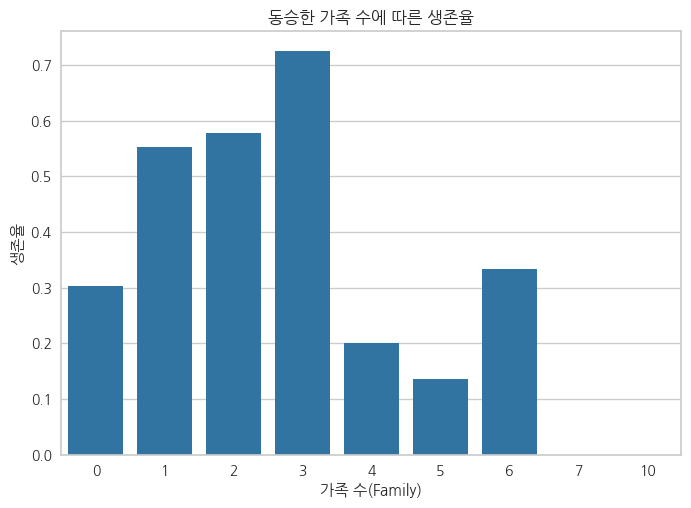

In [52]:
bar = sns.barplot(train,x='Family',y='Survived', ci=None, color='#1f77b4')
bar.set_xlabel('가족 수(Family)')
bar.set_ylabel('생존율')
bar.set_title('동승한 가족 수에 따른 생존율')
plt.show()

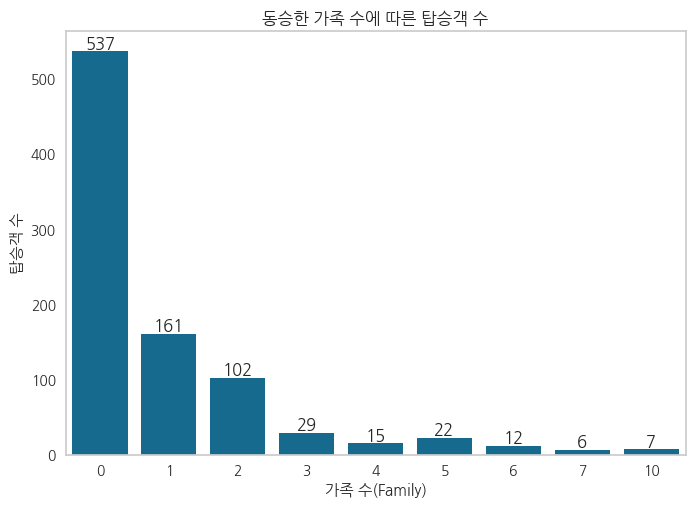

In [54]:
Family_counts = train['Family'].value_counts()

# barplot 그래프 그리기
ax = sns.barplot(x=Family_counts.index, y=Family_counts.values)

# 각 막대 위에 숫자 표시
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel('가족 수(Family)')
plt.ylabel('탑승객 수')
plt.title('동승한 가족 수에 따른 탑승객 수')
plt.grid(False)
plt.show()